In [2]:
import pandas as pd
import numpy as np

Land is in square miles

In [3]:
dfl = pd.read_csv('land.csv')

dfup = pd.read_csv('usafacts_pop.csv')
dfup.rename(columns={'countyFIPS':'fips'}, inplace=True)

dfuc = pd.read_csv('usafacts_cases.csv')
dfuc.rename(columns={'countyFIPS':'fips'}, inplace=True)

In [388]:
# dfuc = dfuc.iloc[:,[0,86]]

In [5]:
unique = dfuc.fips.unique()

In [6]:
unique

array([    0,  1001,  1003, ..., 56041, 56043, 56045])

In [7]:
dfup = dfup.loc[dfup.fips.isin(unique)]

In [8]:
dfl = dfl.loc[dfl.fips.isin(unique)]
dfl = dfl.rename(columns={'LND110210':'land', 'POP060210': 'pop'})

In [9]:
dfuc = dfuc.loc[dfuc.fips != 0]
dfup = dfup.loc[dfup.fips != 0]

dfuc = dfuc.sort_values(by='fips')
dfup = dfup.sort_values(by='fips')
dfuc = dfuc.reset_index(drop=True)
dfup = dfup.reset_index(drop=True)

In [10]:
dfuc = dfuc.drop([0], axis=0)
dfuc = dfuc.reset_index(drop=True)

In [11]:
dfuc.shape

(3144, 87)

In [12]:
dfup.shape

(3144, 4)

In [16]:
dfu = pd.concat([dfup, dfuc.drop(columns='fips')], axis=1)

In [27]:
dfu.iloc[:,:7]

fips        County Name State  population        County Name State  \
0      1001     Autauga County    AL       55869     Autauga County    AL   
1      1003     Baldwin County    AL      223234     Baldwin County    AL   
2      1005     Barbour County    AL       24686     Barbour County    AL   
3      1007        Bibb County    AL       22394        Bibb County    AL   
4      1009      Blount County    AL       57826      Blount County    AL   
...     ...                ...   ...         ...                ...   ...   
3139  56037  Sweetwater County    WY       42343  Sweetwater County    WY   
3140  56039       Teton County    WY       23464       Teton County    WY   
3141  56041       Uinta County    WY       20226       Uinta County    WY   
3142  56043    Washakie County    WY        7805    Washakie County    WY   
3143  56045      Weston County    WY        6927      Weston County    WY   

      stateFIPS  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
3139         56  
3140         56  
3141         56  
3142         56  
3143         56  

[3144 rows x 7 columns]

In [399]:
dfl = dfl.drop([0], axis=0)
dfl = dfl.reset_index(drop=True)

In [400]:
unique2 = dfl.fips.unique()

In [401]:
dfu = dfu.loc[dfu.fips.isin(unique2)]

In [402]:
dfu = dfu.reset_index(drop=True)

In [403]:
df = pd.concat([dfu, dfl.drop(columns='fips')], axis=1)

In [404]:
df = df.rename(columns={'4/13/20': 'cases'})

In [405]:
df = df.rename(columns={'State':'St'})

In [406]:
df.loc[df['County Name'] == 'Elko County']

fips  cases  County Name  St  population      land  pop
1751  32007     11  Elko County  NV       52778  17169.83  2.8

In [407]:
df['density'] = df.population / df.land

In [408]:
df['casespc'] = (df.cases / df.population) * 100_000

In [409]:
import seaborn as sns

In [410]:
plt.style.use('default')

(1, 4000)

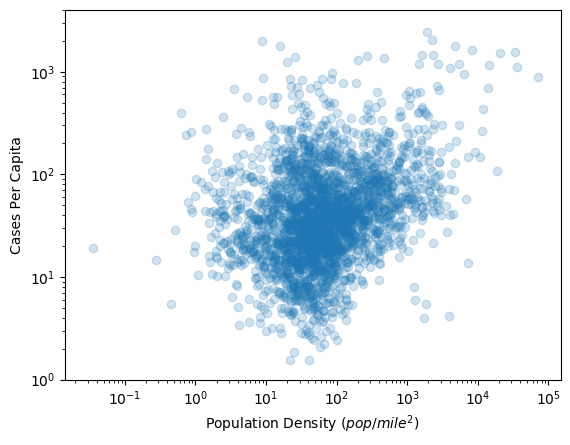

In [411]:
sns.regplot(df.density, df.casespc, scatter=True, scatter_kws={'alpha':0.2})
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cases Per Capita')
plt.xlabel('Population Density ($pop / mile^2$)')
plt.ylim(1, 4000)

(1, 4000)

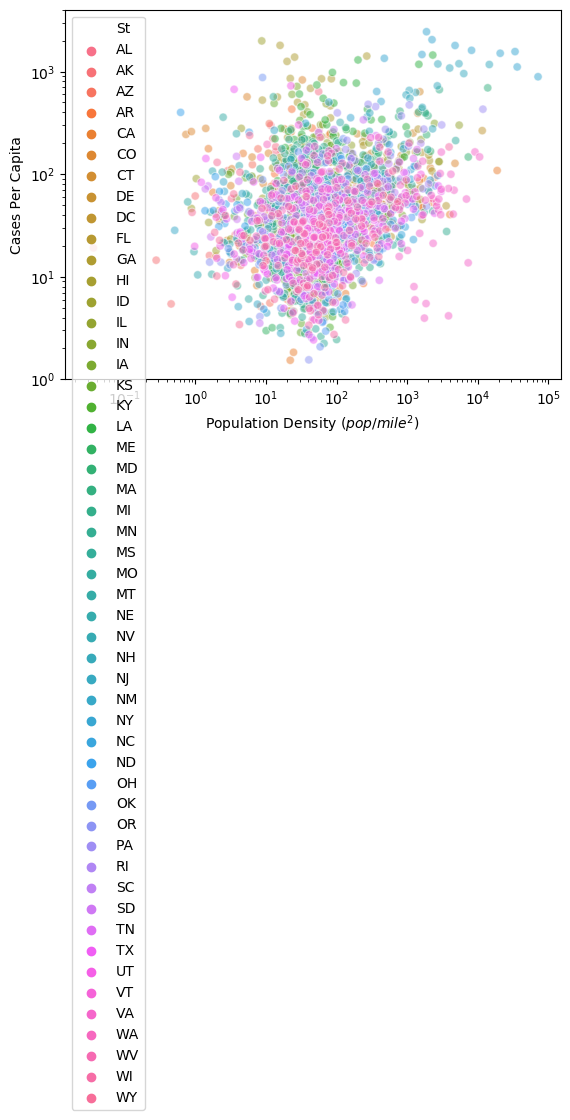

In [413]:
sns.scatterplot(x='density', y='casespc', hue='St', data=df, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cases Per Capita')
plt.xlabel('Population Density ($pop / mile^2$)')
plt.ylim(1, 4000)

In [432]:
def specialize(row):
    if row.St == 'NY':
        return 'New York'
    elif row.St == 'CA':
        return 'California'
    elif row.St == 'NJ':
        return 'New Jersey'
    elif row.St == 'LA':
        return 'Louisiana'
    else:
        return 'Other States'

In [433]:
df['Counties in\nSpecific States'] = df.apply(specialize, axis='columns')

In [503]:
colors = sns.color_palette()[1:5]
colors.reverse()

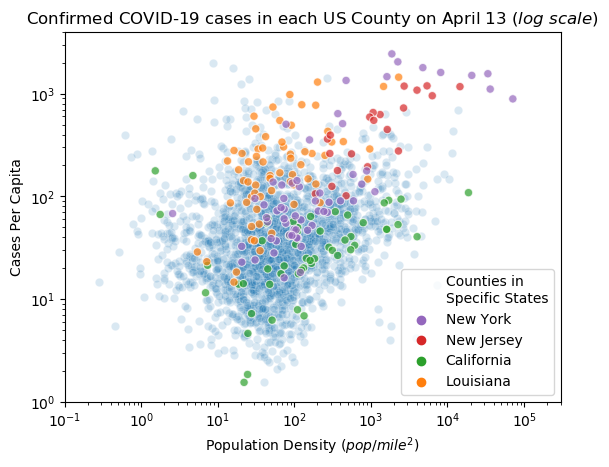

In [510]:
sns.scatterplot(x='density', y='casespc',
                color=sns.color_palette()[0], 
                data=df.loc[(df['Counties in\nSpecific States'] == 'Other States')], 
                alpha=0.17)
sns.scatterplot(x='density', y='casespc', hue='Counties in\nSpecific States', 
                palette=colors, 
                data=df.loc[(df['Counties in\nSpecific States'] == 'New York') | 
                            (df['Counties in\nSpecific States'] == 'New Jersey') | 
                            (df['Counties in\nSpecific States'] == 'California') |
                           (df['Counties in\nSpecific States'] == 'Louisiana')] , 
                            hue_order=['New York', 'New Jersey', 'California', 'Louisiana'], 
                            alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cases Per Capita')
plt.xlabel('Population Density ($pop / mile^2$)')
plt.ylim(1, 4000)
plt.xlim(0.1, 300_000)
plt.title('Confirmed COVID-19 cases in each US County on April 13 ($log \,\, scale$)')
# plt.savefig('casespc.png', dpi=300)
plt.show()

AttributeError: 'FuncAnimation' object has no attribute 'writers'

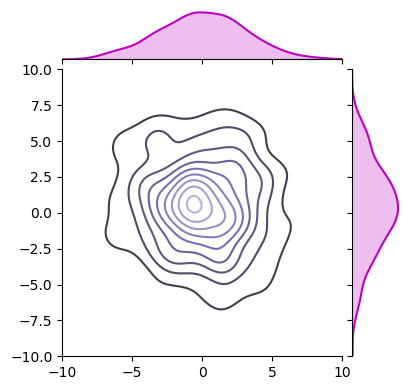

In [516]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

def get_data(i=0):
    x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
    return x,y

x,y = get_data()
g = sns.JointGrid(x=x, y=y, size=4)
lim = (-10,10)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, lim, lim)
    g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_marginals(sns.kdeplot, color="m", shade=True)

frames=np.sin(np.linspace(0,2*np.pi,17))*5
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)

Writer = ani.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

ani.save('animation.mp4', writer=writer)

# plt.show()

In [490]:
x = df.loc[(df.casespc > 0) & (df.casespc < np.float('inf'))].density
y = df.loc[(df.casespc > 0) & (df.casespc < np.float('inf'))].casespc

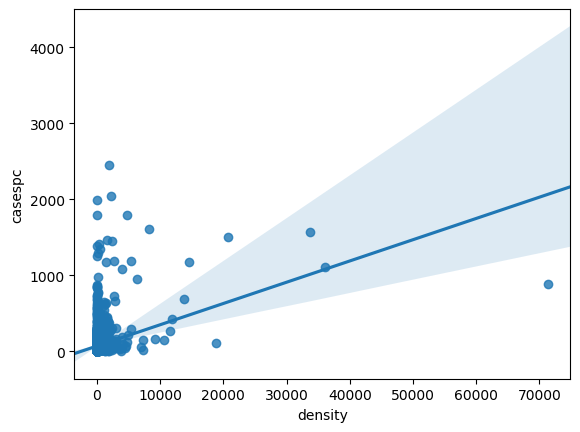

In [491]:
sns.regplot(x, y)

In [499]:
np.corrcoef(x, y)

array([[1.        , 0.33060755],
       [0.33060755, 1.        ]])

(0.1, 100000)

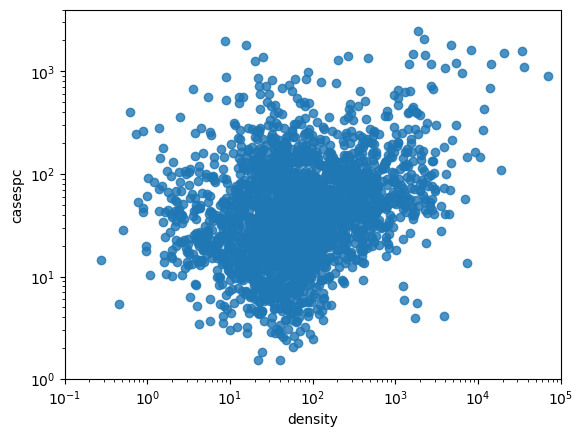

In [455]:
sns.regplot(x='density', y='casespc', data=df, fit_reg=True)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1, 4000)
plt.xlim(0.1, 100_000)

In [458]:
np.polyfit(df.density, df.casespc, 1)

LinAlgError: SVD did not converge in Linear Least Squares

In [313]:
df.sort_values(by='casespc', ascending=False)

fips  cases                 County Name State  population       land  \
186    6000     21  Grand Princess Cruise Ship    CA           0  155779.22   
1872  36087   7965             Rockland County    NY      325789     173.55   
1888  36119  19786          Westchester County    NY      967506     430.50   
558   16013    458               Blaine County    ID       23021    2643.59   
507   13243    122             Randolph County    GA        6778     428.24   
...     ...    ...                         ...   ...         ...        ...   
835   19091      0             Humboldt County    IA        9558     434.35   
825   19071      0              Fremont County    IA        6960     511.15   
823   19067      0                Floyd County    IA       15642     500.63   
3141  56045      0               Weston County    WY        6927    2398.09   
92     2270      0    Wade Hampton Census Area    AK           0   17081.43   

         pop      density      casespc  spec  
186    239.1     0.000000          inf    CA  
1872  1795.9  1877.205416  2444.833926    NY  
1888  2204.7  2247.400697  2045.051917    NY  
558      8.1     8.708234  1989.487859  None  
507     18.0    15.827573  1799.940986  None  
...      ...          ...          ...   ...  
835     22.6    22.005295     0.000000  None  
825     14.6    13.616355     0.000000  None  
823     32.6    31.244632     0.000000  None  
3141     3.0     2.888549     0.000000  None  
92       0.4     0.000000          NaN  None  

[3142 rows x 10 columns]

In [379]:
df.sort_values(by='population')

fips  cases                 County Name  St  population       land  \
186    6000     21  Grand Princess Cruise Ship  CA           0  155779.22   
92     2270      0    Wade Hampton Census Area  AK           0   17081.43   
549   15005      0              Kalawao County  HI          86      11.99   
2673  48301      0               Loving County  TX         169     668.93   
2657  48269      0                 King County  TX         272     910.87   
...     ...    ...                         ...  ..         ...        ...   
223    6073   1847            San Diego County  CA     3338330    4206.63   
103    4013   2020             Maricopa County  AZ     4485414    9200.14   
2623  48201   3629               Harris County  TX     4713325    1703.48   
611   17031  15474                 Cook County  IL     5150233     945.33   
205    6037   9420          Los Angeles County  CA    10039107    4057.88   

         pop      density     casespc          spec        states  \
186    239.1     0.000000         inf            CA            CA   
92       0.4     0.000000         NaN  Other States  Other States   
549      7.5     7.172644    0.000000  Other States  Other States   
2673     0.1     0.252642    0.000000  Other States  Other States   
2657     0.3     0.298616    0.000000  Other States  Other States   
...      ...          ...         ...           ...           ...   
223    735.8   793.587741   55.327065            CA            CA   
103    414.9   487.537581   45.034862  Other States  Other States   
2623  2402.4  2766.880151   76.994478  Other States  Other States   
611   5495.1  5448.079507  300.452426  Other States  Other States   
205   2419.6  2473.978284   93.833047            CA            CA   

            States  
186             CA  
92    Other States  
549   Other States  
2673  Other States  
2657  Other States  
...            ...  
223             CA  
103   Other States  
2623  Other States  
611   Other States  
205             CA  

[3142 rows x 12 columns]

In [127]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['Unemployment Rate (%)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
#     binning_endpoints=endpts,
#     colorscale=colorscale,
#     show_state_data=False,
#     show_hover=True, centroid_marker={'opacity': 0},
#     asp=2.9, title='USA by Unemployment %',
#     legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

In [103]:
df_sample['FIPS']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3214    72145
3215    72147
3216    72149
3217    72151
3218    72153
Name: FIPS, Length: 3219, dtype: object

In [105]:
dfl = dfl.sort_values(by='fips')

In [131]:
dfl.land

0       3531905.43
1         50645.33
2           594.44
3          1589.78
4           884.88
           ...    
3190      10426.65
3191       3995.38
3192       2081.26
3193       2238.55
3194       2398.09
Name: land, Length: 3195, dtype: float64

In [268]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = dfl.fips.tolist()
values = dfl.land.tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

NameError: name 'np' is not defined

In [111]:
df_sample['FIPS']

0       01001
1       01003
2       01005
3       01007
4       01009
        ...  
3214    72145
3215    72147
3216    72149
3217    72151
3218    72153
Name: FIPS, Length: 3219, dtype: object

In [115]:
dfl.fips = dfl.fips.astype('object')

In [122]:
dfl.fips

0           0
1        1000
2        1001
3        1003
4        1005
        ...  
3190    56037
3191    56039
3192    56041
3193    56043
3194    56045
Name: fips, Length: 3195, dtype: object

In [124]:
dfl.fips = dfl.fips.apply(lambda x: str(x).zfill(5))

In [129]:
dfl.values

array([['00000', 3531905.43, 87.4],
       ['01000', 50645.33, 94.4],
       ['01001', 594.44, 91.8],
       ...,
       ['56041', 2081.26, 10.1],
       ['56043', 2238.55, 3.8],
       ['56045', 2398.09, 3.0]], dtype=object)

In [137]:
fips

['00000',
 '01000',
 '01001',
 '01003',
 '01005',
 '01007',
 '01009',
 '01011',
 '01013',
 '01015',
 '01017',
 '01019',
 '01021',
 '01023',
 '01025',
 '01027',
 '01029',
 '01031',
 '01033',
 '01035',
 '01037',
 '01039',
 '01041',
 '01043',
 '01045',
 '01047',
 '01049',
 '01051',
 '01053',
 '01055',
 '01057',
 '01059',
 '01061',
 '01063',
 '01065',
 '01067',
 '01069',
 '01071',
 '01073',
 '01075',
 '01077',
 '01079',
 '01081',
 '01083',
 '01085',
 '01087',
 '01089',
 '01091',
 '01093',
 '01095',
 '01097',
 '01099',
 '01101',
 '01103',
 '01105',
 '01107',
 '01109',
 '01111',
 '01113',
 '01115',
 '01117',
 '01119',
 '01121',
 '01123',
 '01125',
 '01127',
 '01129',
 '01131',
 '01133',
 '02000',
 '02013',
 '02016',
 '02020',
 '02050',
 '02060',
 '02068',
 '02070',
 '02090',
 '02100',
 '02105',
 '02110',
 '02122',
 '02130',
 '02150',
 '02164',
 '02170',
 '02180',
 '02185',
 '02188',
 '02195',
 '02198',
 '02220',
 '02230',
 '02240',
 '02261',
 '02270',
 '02275',
 '02282',
 '02290',
 '04000',
